### For this exercise, you will analyze a dataset from Amazon. 

### With the given data for 548552 products, perform exploratory analysis and make suggestions for further analysis on the following aspects:
### 1. Trustworthiness of ratings
Ratings are susceptible to manipulation, bias etc. What can you say (quantitatively
speaking) about the ratings in this dataset?

### 2. Category bloat

Consider the product group named 'Books'. Each product in this group is associated with
categories. Naturally, with categorization, there are tradeoffs between how broad or
specific the categories must be.  For this dataset, quantify the following:

    a. Is there redundancy in the categorization? How can it be identified/removed?
    b. Is is possible to reduce the number of categories drastically (say to 10% of existing categories) by sacrificing relatively few category entries (say close to 10%)?

In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('../KeepUp/amazon-meta.txt', encoding="utf8") as myfile:
    text = myfile.read()
myfile.close()
text[:1000]

'# Full information about Amazon Share the Love products\nTotal items: 548552\n\nId:   0\nASIN: 0771044445\n  discontinued product\n\nId:   1\nASIN: 0827229534\n  title: Patterns of Preaching: A Sermon Sampler\n  group: Book\n  salesrank: 396585\n  similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X\n  categories: 2\n   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]\n   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]\n  reviews: total: 2  downloaded: 2  avg rating: 5\n    2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9\n    2003-12-14  cutomer: A2VE83MZF98ITY  rating: 5  votes:   6  helpful:   5\n\nId:   2\nASIN: 0738700797\n  title: Candlemas: Feast of Flames\n  group: Book\n  salesrank: 168596\n  similar: 5  0738700827  1567184960  1567182836  0738700525  0738700940\n  categories: 2\n   |Books[283155]|Subjects[1000]|Religi

#### We get a quick look at the file structure and see each entry can be grouped by product 'Id: ' as was listed in the data description.  The Id:  entries are seperated by double line breaks which is how we will group the entries when parsing.

In [3]:
#parse and group lines looking for extra break before Id:
id_groups = []  #entire string block for each product id
entry = []  #text parts for each id
for line in text.split('\n'):
    if line != '':
        entry.append(line)
    else:
        id_groups.append(entry)
        entry = []
del id_groups[0]  #remove first entry that isn't related to product Id
id_groups[0:3]


[['Id:   0', 'ASIN: 0771044445', '  discontinued product'],
 ['Id:   1',
  'ASIN: 0827229534',
  '  title: Patterns of Preaching: A Sermon Sampler',
  '  group: Book',
  '  salesrank: 396585',
  '  similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X',
  '  categories: 2',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]',
  '  reviews: total: 2  downloaded: 2  avg rating: 5',
  '    2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9',
  '    2003-12-14  cutomer: A2VE83MZF98ITY  rating: 5  votes:   6  helpful:   5'],
 ['Id:   2',
  'ASIN: 0738700797',
  '  title: Candlemas: Feast of Flames',
  '  group: Book',
  '  salesrank: 168596',
  '  similar: 5  0738700827  1567184960  1567182836  0738700525  0738700940',
  '  categories: 2',
  '   |Books[283155]|Subjects[1000]|Re

#### To answer the first question we must extract each product rating into a dataframe to analyze.

In [4]:
snip = id_groups[0:2]
del snip[0]
snip

[['Id:   1',
  'ASIN: 0827229534',
  '  title: Patterns of Preaching: A Sermon Sampler',
  '  group: Book',
  '  salesrank: 396585',
  '  similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X',
  '  categories: 2',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]',
  '  reviews: total: 2  downloaded: 2  avg rating: 5',
  '    2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9',
  '    2003-12-14  cutomer: A2VE83MZF98ITY  rating: 5  votes:   6  helpful:   5']]

In [5]:
import re
ratings={}  #ratings dictionary
skip = False

#extract the main info, there are still further breakdowns for extracting actual similar, categories, and review entries that
#are not completed here
for group in id_groups:
    for block in group:
        if block.startswith('Id:'):
            Id = block.split()[-1]
        elif block.startswith('ASIN:'):
            ASIN = block.split()[-1]
        elif re.match('.*title:',block):
            title = block.split(':')[-1]
        elif re.match('.*group:',block):
            group = block.split(':')[-1]
        elif re.match('.*rank:',block):
            salesrank = block.split(':')[-1]
        elif re.match('.*similar:',block):
            similar = block.split(':')[-1]
        elif re.match('.*categories:',block):
            num_categories = block.split(':')[-1]
        elif re.match('.*reviews:',block):
            total_reviews = block.split()[2]
            downloads = block.split()[4]
            avg_rating = block.split()[7]
        elif re.match('.*discontinued product',block):
            skip = True
    if skip != True:
        ratings[Id] = [ASIN, title, group, salesrank, similar, num_categories, total_reviews, downloads, avg_rating]
    else:
        skip = False

In [6]:
data_df = pd.DataFrame.from_dict(ratings)
data_df.head()

,1,10,100,1000,10000,100000,100001,100002,100003,100004,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,0827229534,0375709363,0787958743,0830815627,1589600282,1893115755,0553297090,6304198337,B00000G25A,B00000IIHJ,...,B00000G252,B00000G257,B00000G253,0886466636,0837730287,1585744212,0340728345,1857925246,0962153222,0966616820
1,A Sermon Sampler,The Edward Said Reader,A Systems Approach to Successful Training (J-...,Invitation to Theology,Exposition of Paul's Epistles,Internet Programming With VB,Timescape,Wish Fairies,Destiny,Celui Qui Chante,...,Tigers of the Raj,Kruder & Dorfmeister Session,Secret of the Wind,Dark They Were and Golden Eyed,Kissing Legalese Goodbye,A Connoisseur's Guide to Gourmet Recipes and ...,Anoraknophobia,A Peep Behind the Scenes,German Texts,Secrets of Successful Fundraising
2,Book,Book,Book,Book,Book,Book,Book,Video,Music,Music,...,Music,Music,Music,Book,Book,Book,Book,Book,Book,Book
3,396585,220379,783690,497795,1544234,750978,139702,1277,24874,278300,...,107627,3436,79189,1224967,321276,345915,805006,1467003,606100,461669
4,5 0804215715 156101074X 0687023955 068707...,5 039474067X 0679730672 0679750541 140003...,5 1886624089 0397554168 1560535253 087584...,5 0830814493 0687095735 0801090962 096026...,0,2 186100222X 0782125573,5 0380790521 0446611557 0446611565 044661...,5 6303966268 6304133359 6303966276 630419...,5 B000000NMG B00005NDUQ B000000NKR B00006...,0,...,5 B00008PRPN B0000009D1 B000056EQO B00001...,5 B00004KDDZ B0000013EH B00004WFIZ B00000...,5 B0000009CM B00006JID7 B00005QB43 B00005...,0,0,5 0894801341 189258803X 0767902637 155622...,5 0841730350 1840234954 1840234970 074325...,0,5 0962153214 0155848631 0131333720 019516...,5 0966616812 0062732056 0809238462 159196...


In [7]:
df = data_df.T.reset_index()
df.columns = ['Id', 'ASIN', 'title', 'group', 'salesrank', 'similar', 'num_categories', 'total_reviews',
              'downloads', 'avg_rating']
df.head()

,Id,ASIN,title,group,salesrank,similar,num_categories,total_reviews,downloads,avg_rating
0,1,0827229534,A Sermon Sampler,Book,396585,5 0804215715 156101074X 0687023955 068707...,2,2,2,5
1,10,0375709363,The Edward Said Reader,Book,220379,5 039474067X 0679730672 0679750541 140003...,3,6,6,4
2,100,0787958743,A Systems Approach to Successful Training (J-...,Book,783690,5 1886624089 0397554168 1560535253 087584...,2,0,0,0
3,1000,0830815627,Invitation to Theology,Book,497795,5 0830814493 0687095735 0801090962 096026...,1,1,1,5
4,10000,1589600282,Exposition of Paul's Epistles,Book,1544234,0,3,0,0,0


In [8]:
#covert some string object to numerical
df['Id'] = df['Id'].astype(int)
df['salesrank'] = df['salesrank'].astype(int)
df['num_categories'] = df['num_categories'].astype(int)
df['total_reviews'] = df['total_reviews'].astype(int)
df['downloads'] = df['downloads'].astype(int)
df['avg_rating'] = df['avg_rating'].astype(float)
df['group'] = df['group'].astype(str)
df = df.sort_values('Id')
df.head()

,Id,ASIN,title,group,salesrank,similar,num_categories,total_reviews,downloads,avg_rating
0,1,0827229534,A Sermon Sampler,Book,396585,5 0804215715 156101074X 0687023955 068707...,2,2,2,5.0
109901,2,0738700797,Feast of Flames,Book,168596,5 0738700827 1567184960 1567182836 073870...,2,12,12,4.5
219673,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,0,1,1,1,5.0
329476,4,0842328327,1 and 2 Timothy and Titus,Book,631289,5 0842328130 0830818138 0842330313 084232...,5,1,1,4.0
439370,5,1577943082,Executive,Book,455160,5 157794349X 0892749504 1577941829 089274...,2,0,0,0.0


In [9]:
#what are all the product groups
df.group.value_counts()

 Book            393561
 Music           103143
 Video            26131
 DVD              19828
 Toy                  8
 Software             5
 CE                   4
 Baby Product         1
 Sports               1
[]                    1
 Video Games          1
Name: group, dtype: int64

We can see there are a few product groups that do not appear very often.  For exploring the ratings, we will focus only of the top 4 group categories from the list.

In [10]:
list = [' Book', ' Music', ' Video', ' DVD']
df2 = df[df['group'].isin(list)]
df2.group.value_counts()

 Book     393561
 Music    103143
 Video     26131
 DVD       19828
Name: group, dtype: int64

In [11]:
df2.describe()

,Id,salesrank,num_categories,total_reviews,downloads,avg_rating
count,542663.000000,5.426630e+05,542663.000000,542663.000000,542663.000000,542663.000000
mean,274413.731968,4.893425e+05,4.624515,14.340250,13.992435,3.209519
std,158454.407937,5.677264e+05,4.450630,74.769781,71.909770,1.996306
min,1.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,137160.500000,9.075900e+04,2.000000,0.000000,0.000000,0.000000
50%,274428.000000,3.005140e+05,4.000000,2.000000,2.000000,4.000000
75%,411673.500000,6.720870e+05,6.000000,8.000000,7.000000,5.000000
max,548550.000000,3.798351e+06,116.000000,5545.000000,4995.000000,5.000000


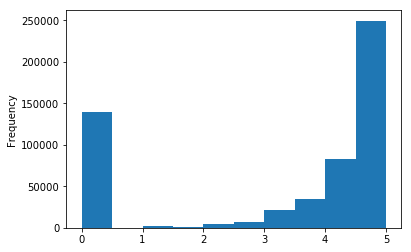

In [12]:
df2['avg_rating'].plot(kind = 'hist')

The histogram of avg ratings is interesting in that the extremes of ratings 0 vs 5 appear with much more frequency than do middling reviews.  There ends up being a bias in the ratings in that the extrems, people who are either very please or very displeased, tend to have a higher rating entry capture rate.


### Category bloat
Consider the product group named 'Books'. Each product in this group is associated with categories. Naturally, with categorization, there are tradeoffs between how broad or specific the categories must be. For this dataset, quantify the following:

a. Is there redundancy in the categorization? How can it be identified/removed?

b. Is is possible to reduce the number of categories drastically (say to 10% of existing categories) by sacrificing relatively few category entries (say close to 10%)?

#### For part a, we will need to split apart the categorization better.

In [13]:
import re
category_list=[]  #top category list
totals = 0
#lets strip out the subcategories for books and create a df
for group in id_groups:
    for block in group:
        if block.startswith('  group:'):
            product = block.split(':')[-1]
            if 'Book' in product : totals+=1
        elif block.startswith('   |Books'):
            category_list.append(block.strip())
sub_category = []
for line in category_list:
    for subcat in line.split('|')[1:]:
        sub_category.append(subcat)

categorical_df = pd.DataFrame.from_dict(sub_category)
categorical_df.head()

,0
0,Books[283155]
1,Subjects[1000]
2,Religion & Spirituality[22]
3,Christianity[12290]
4,Clergy[12360]


In [14]:
print ('total number of books                               :', totals)
print ('total categories/sub_categories for all books       :', len(categorical_df[0]))
print ('total unique categories/sub_categories for all books:', len(categorical_df[0].unique()))

#get the unique category counts and exploring the top 20 unique
categorical_df[0].value_counts().head(20)

total number of books                               : 393561
total categories/sub_categories for all books       : 6920870
total unique categories/sub_categories for all books: 12930


Books[283155]                       1287060
Subjects[1000]                      1222836
Children's Books[4]                  134299
Nonfiction[53]                       106977
Religion & Spirituality[22]           93690
Literature & Fiction[17]              84721
Business & Investing[3]               74125
Professional & Technical[173507]      67693
Computers & Internet[5]               66742
Health, Mind & Body[10]               66380
Reference[21]                         50115
History[9]                            48131
Christianity[12290]                   41872
Science[75]                           41727
Biographies & Memoirs[2]              40075
Home & Garden[48]                     39598
Arts & Photography[1]                 36472
Entertainment[86]                     34815
Formats[504358]                       34524
Social Sciences[11232]                31391
Name: 0, dtype: int64

We can see that there is a fair amount of redundancy in the category structure setup.  Entries that are very non-descript like "Subjects" might easily be dropped.  

### B. (Suggested duration: 30 mins)

#### 1. Algorithm thinking
How would build the product categorization from scratch, using similar/co-purchased
information?
#### 2. Product thinking
Now, put on your 'product thinking' hat.

    a. Is it a good idea to show users the categorization hierarchy for items?
    b. Is it a good idea to show users similar/co-purchased items?
    c. Is it a good idea to show users reviews and ratings for items?
    d. For each of the above, why? How will you establish the same?

The best way to create a product categorization schema from scratch may be to create a categorization algorithm from the purchase information and the item descriptions.  

I believe categorization heirachy is not a necessary item to show, but when a user wants to see it there could be an available drop down.  This would prevent cluttering but still allow the user to access the info if wanted.

Showing similar/co-purchased items is a great idea to show users.  Often times this can speed up the search process for the user and the user may not always be aware they need or want the similar/co-purchased item until reminded.  This could increase the number of purchases made per visit.  

User reviews and ratings are critical to many user's purchase habits and should be shown.  Care must be taken to ensure the reviews/ratings are as accurate and trustworthy as possible because negative experience on a product could also erode trust in purchasing from the site again.

